<h1>Bibliotecas<h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics
from sqlalchemy import create_engine
import schedule 
import time

<h1>Dataframe não Processado</h1>

In [2]:
j=pd.read_json('https://jeap.rio.rj.gov.br/dadosAbertosAPI/v2/transporte/veiculos/onibus2')
j

,ordem,linha,latitude,longitude,velocidade,dataHora
0,D87859,2336,-22.91671,-43.60831,0,07-19-2022 03:57:53
1,C47755,600,-22.95258,-43.34872,0,07-19-2022 06:07:15
2,D17105,849,-22.91718,-43.60826,1,07-19-2022 06:49:22
3,A63521,104,-22.86757,-43.25888,0,07-19-2022 07:39:44
4,C47960,2111,-22.87994,-43.35679,0,07-19-2022 08:12:44
...,...,...,...,...,...,...
3567,B11538,650,-22.85963,-43.36996,33,07-19-2022 15:02:02
3568,B11624,651,-22.87678,-43.32001,38,07-19-2022 15:02:02
3569,B71141,238,-22.91924,-43.26243,11,07-19-2022 15:02:02
3570,B71142,238,-22.91482,-43.21891,0,07-19-2022 15:02:02


<h1>Pré-Processamento</h1>

In [3]:
## Dataframe Original
json = pd.read_json('https://jeap.rio.rj.gov.br/dadosAbertosAPI/v2/transporte/veiculos/onibus2')

#Removendo campos em branco
nan_value = float("NaN")
json.replace("", nan_value, inplace=True)
json.dropna(subset = ["linha"], inplace=True)
json['codigoempresa']=json['ordem'].str.slice(1,4)

# Etapa de construção do novo dataframe

ordem=json['ordem']
linha=json['linha']

empresa=[        "Transportes Paranapuan S/A" if s>="100" and s<"105" else
                  "Viação Penha Rio Ltda" if s>="105" and s<"115" else
                  "Viação Vila Real S/A" if s>="115" and s<"120" else
                  "Expresso Recreio Ltda" if s>="120" and s<"125" else
                  "Viação Normandy To Triângulo Ltda" if s>="125" and s<"130" else
                  "Transportes Barra Ltda" if s>="130" and s<"170" else 
                  "Auto Viação Palmares Ltda" if s>="170" and s<"255" else
                  "Roviária Âncora Matias" if s>="225" and s<"270" else
                  "Caprichosa Auto Ônibus Ltda" if s>="270" and s<"275" else
                  "Transportes Vila Isabel S/A " if s>="275" and s<"285" else
                  "Viação Ideal S/A" if s>="285" and s<"290" else
                  "Empresa Braso Lisboa" if s>="290" and s<"300" else 
                  "Transportes Futuro Ltda" if s>="300" and s<"310" else 
                  "Viação VG Eireli ME" if s>="310" and s<"325" else 
                  "Viação Pavuenense S/A" if s>="325" and s<"410" else 
                  "Real Auto Ônibus Ltda" if s>="410" and s<"425" else 
                  "Viação Acari S/A" if s>="425" and s<"445" else 
                  "Auto Viação Três Amigos Ltda" if s>="445" and s<"475" else
                  "Viação Redentor Ltda" if s>="475" and s<"480" else
                  "Auto Viação Alpha S/A " if s>="480" and s<"500" else
                  "Tijuquinha - Auto Viação Tijuca S/A" if s>="500" and s<"515" else
                  "Viação Novacap S/A" if s>="515" and s<"535" else
                  "Transportes Campo Grande Ltda" if s>="535" and s<"580" else
                  "Viação Nossa Senhora de Lourdes Ltda" if s>="580" and s<"630" else
                  "Gire Transportes Ltda" if s>="630" and s<"710" else
                  "Viação Verdun S/A" if s>="710" and s<"715" else
                  "Viação Nossa Senhora das Graças Ltda" if s>="715" and s<"720" else
                  "Transurb S/A" if s>="720" and s<"860" else
                  "Auto Viação Jabour Ltda" if s>="860" and s<"870" else
                  "Expresso Pégasso Ltda" if s>="870" and s<"999" 
                   else "BRT Rio S.A"  for s in json['codigoempresa']
] 

codigoempresa=json['ordem'].str.slice(1,4)
latitude=json['latitude']
longitude=json['longitude']
velocidade=json['velocidade']
dataHora=json['dataHora'].astype('datetime64[ns]')

# Concatenando os campos num Dataframe Parcial, através do pandas
df2= pd.DataFrame(list(zip(ordem,linha,empresa,latitude,longitude,velocidade,dataHora)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','dataHora'])

#Ajuste de Fuso Horário através do Pandas
DataHoraOriginalChange=df2['dataHora']
df2['dataHoraBrasil']=pd.to_datetime(DataHoraOriginalChange, unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca')

#visualização Parcial do Dataframe
df2


,ordem,linha,empresa,latitude,longitude,velocidade,dataHora,dataHoraBrasil
0,D87859,2336,Expresso Pégasso Ltda,-22.91671,-43.60831,0,2022-07-19 03:57:53,2022-07-19 00:57:53-03:00
1,C47755,600,Viação Redentor Ltda,-22.95258,-43.34872,0,2022-07-19 06:07:15,2022-07-19 03:07:15-03:00
2,D17105,849,Auto Viação Palmares Ltda,-22.91718,-43.60826,1,2022-07-19 06:49:22,2022-07-19 03:49:22-03:00
3,A63521,104,Gire Transportes Ltda,-22.86757,-43.25888,0,2022-07-19 07:39:44,2022-07-19 04:39:44-03:00
4,C47960,2111,Viação Redentor Ltda,-22.87994,-43.35679,0,2022-07-19 08:12:44,2022-07-19 05:12:44-03:00
...,...,...,...,...,...,...,...,...
3560,B11538,650,Viação Vila Real S/A,-22.85963,-43.36996,33,2022-07-19 15:02:02,2022-07-19 12:02:02-03:00
3561,B11624,651,Viação Vila Real S/A,-22.87678,-43.32001,38,2022-07-19 15:02:02,2022-07-19 12:02:02-03:00
3562,B71141,238,Viação Verdun S/A,-22.91924,-43.26243,11,2022-07-19 15:02:02,2022-07-19 12:02:02-03:00
3563,B71142,238,Viação Verdun S/A,-22.91482,-43.21891,0,2022-07-19 15:02:02,2022-07-19 12:02:02-03:00


In [4]:
#Dataframe Final 

ordemfinal=df2['ordem']
linhafinal=df2['linha']
empresafinal=df2['empresa']
latitudefinal=df2['latitude']
longitudefinal=df2['longitude']
velocidadefinal=df2['velocidade']

#Data Padrão Brasileiro
data=df2['dataHoraBrasil'].astype("string")
x=data.str.slice(0,10)
final=x.astype('datetime64[ns]')
data2=final.dt.strftime('%d/%m/%Y')

#Hora
hora=df2['dataHoraBrasil'].astype("string")
horafinal=hora.str.slice(11,19)

# Criando um Dataframe Final
dfparcial= pd.DataFrame(list(zip(ordemfinal,linhafinal,empresafinal,latitudefinal,longitudefinal,velocidadefinal,horafinal,data2)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','horario','data'])
dfFinal=dfparcial.drop_duplicates(subset=['latitude','longitude'])

dfFinal


,ordem,linha,empresa,latitude,longitude,velocidade,horario,data
0,D87859,2336,Expresso Pégasso Ltda,-22.91671,-43.60831,0,00:57:53,19/07/2022
1,C47755,600,Viação Redentor Ltda,-22.95258,-43.34872,0,03:07:15,19/07/2022
2,D17105,849,Auto Viação Palmares Ltda,-22.91718,-43.60826,1,03:49:22,19/07/2022
3,A63521,104,Gire Transportes Ltda,-22.86757,-43.25888,0,04:39:44,19/07/2022
4,C47960,2111,Viação Redentor Ltda,-22.87994,-43.35679,0,05:12:44,19/07/2022
...,...,...,...,...,...,...,...,...
3560,B11538,650,Viação Vila Real S/A,-22.85963,-43.36996,33,12:02:02,19/07/2022
3561,B11624,651,Viação Vila Real S/A,-22.87678,-43.32001,38,12:02:02,19/07/2022
3562,B71141,238,Viação Verdun S/A,-22.91924,-43.26243,11,12:02:02,19/07/2022
3563,B71142,238,Viação Verdun S/A,-22.91482,-43.21891,0,12:02:02,19/07/2022


In [5]:
#Informação referente ao tipo da variavel
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3564
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ordem       3561 non-null   object 
 1   linha       3561 non-null   object 
 2   empresa     3561 non-null   object 
 3   latitude    3561 non-null   float64
 4   longitude   3561 non-null   float64
 5   velocidade  3561 non-null   int64  
 6   horario     3561 non-null   object 
 7   data        3561 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [6]:
#Linhas de ônibus não duplicadas

dfFinal['linha'].unique()

array(['2336', '600', '849', '104', '2111', '639', '687', '2339', '2307',
       '878', '583', '793', '476', '298', '472', '795', '804', '461',
       '711', '548', '615', '2112', '2345', '920', '557', 'LECD38', '292',
       '108', '553', '460', '321', '558', 'SP805', '2114', '355', '313',
       '801', '770', '803', '2110', '335', '863', '497', '629', '840',
       '810', '306', '315', '665', '880', '900', '342', '692', '328',
       '774', '202', '550', '249', '794', '302', '484', '745', '397',
       '634', '483', '220', '2303', 'LECD40', '906', '622', '275', '485',
       '2383', '378', '309', '685', '721', '866', '329', '712', '362',
       '926', '2344', '348', '2308', '300', '326', '2335', '870', '838',
       '638', '2310', '2309', '107', '953', '775', 'SV779', '399', '771',
       'SV394', '892', '944', '433', '112', '696', '2802', '463', '919',
       '324', '554', 'SV774', '110', '783', '606', '2334', '2343', '835',
       '884', '822', '867', '897', '630', 'SVA685', '759',

<h1>Dataframe Velocidade por linhas de ônibus</h1>

In [7]:
## Daframe Velocidade por linhas de ônibus


#Filtros em Relação a Linha dos ônibus em circulação e da velocidade ser 
#diferente de zero.

linha770=(dfFinal.loc[(dfFinal['linha']=="770") & (dfFinal['velocidade']!=0),['velocidade']])
L770=linha770.rename(columns={'velocidade':'Linha770'})

linha803=(dfFinal.loc[(dfFinal['linha']=="803") & (dfFinal['velocidade']!=0),['velocidade']])
L803=linha803.rename(columns={'velocidade':'Linha803'})

linha343=(dfFinal.loc[(dfFinal['linha']=="343") & (dfFinal['velocidade']!=0),['velocidade']])
L343=linha343.rename(columns={'velocidade':'Linha343'})

linha550=(dfFinal.loc[(dfFinal['linha']=="550") & (dfFinal['velocidade']!=0),['velocidade']])
L550=linha550.rename(columns={'velocidade':'Linha550'})

linha555=(dfFinal.loc[(dfFinal['linha']=="555") & (dfFinal['velocidade']!=0),['velocidade']])
L555=linha555.rename(columns={'velocidade':'Linha555'})

linha779=(dfFinal.loc[(dfFinal['linha']=="779") & (dfFinal['velocidade']!=0),['velocidade']])
L779=linha779.rename(columns={'velocidade':'Linha779'})

linha383=(dfFinal.loc[(dfFinal['linha']=="383") & (dfFinal['velocidade']!=0),['velocidade']])
L383=linha383.rename(columns={'velocidade':'Linha383'})

linha945=(dfFinal.loc[(dfFinal['linha']=="945") & (dfFinal['velocidade']!=0),['velocidade']])
L945=linha945.rename(columns={'velocidade':'Linha945'})

#Conversão dos Filtros para lista

X1=L770['Linha770'].tolist()
X2=L803['Linha803'].tolist()
X3=L343['Linha343'].tolist()
X4=L550['Linha550'].tolist()
X5=L555['Linha555'].tolist()
X6=L779['Linha779'].tolist()
X7=L383['Linha383'].tolist()
X8=L945['Linha945'].tolist()


#Dataframe Velocidade
df = pd.DataFrame({
    
    'LINHA770': pd.Series(X1,dtype='float64'),
    'LINHA803': pd.Series(X2,dtype='float64'),
    'LINHA343': pd.Series(X3,dtype='float64'),
    'LINHA550': pd.Series(X4,dtype='float64'),
    'LINHA555': pd.Series(X5,dtype='float64'),
    'LINHA779': pd.Series(X6,dtype='float64'),
    'LINHA383': pd.Series(X7,dtype='float64'),
    'LINHA945': pd.Series(X8,dtype='float64')
})

#Substituição Not a Number por 0
df_velocidade_linhas=df.replace(np.nan, 0)
df_velocidade_linhas



,LINHA770,LINHA803,LINHA343,LINHA550,LINHA555,LINHA779,LINHA383,LINHA945
0,48.0,12.0,21.0,26.0,53.0,42.0,16.0,4.0
1,55.0,11.0,63.0,66.0,13.0,42.0,16.0,0.0
2,36.0,47.0,5.0,16.0,38.0,34.0,28.0,0.0
3,57.0,34.0,45.0,14.0,39.0,50.0,12.0,0.0
4,25.0,10.0,28.0,11.0,16.0,19.0,32.0,0.0
5,47.0,9.0,34.0,32.0,9.0,18.0,29.0,0.0
6,58.0,7.0,49.0,8.0,0.0,38.0,32.0,0.0
7,46.0,15.0,80.0,19.0,0.0,23.0,6.0,0.0
8,0.0,4.0,17.0,12.0,0.0,21.0,38.0,0.0
9,0.0,25.0,35.0,14.0,0.0,0.0,42.0,0.0


<h1> Gráfico de X-Barra E R (Amplitude) - Velocidade em relação as linhas de Ônibus</h1>

All points within control limits.
All points within control limits.


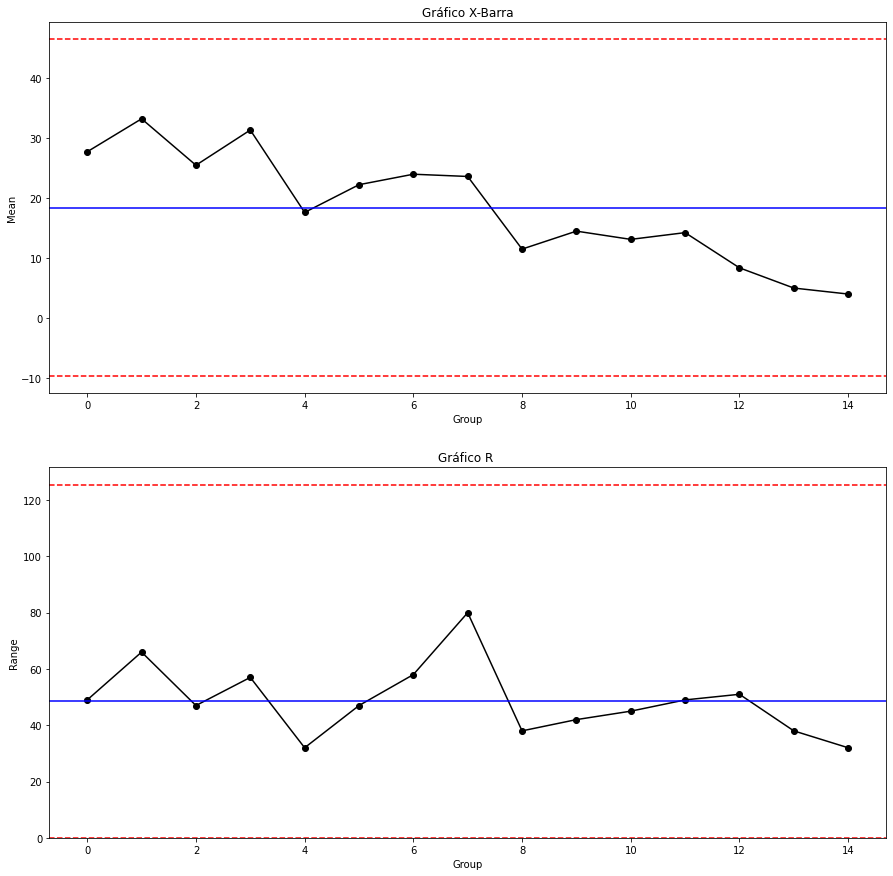

In [8]:

x = np.array(df_velocidade_linhas[['LINHA770','LINHA803','LINHA343','LINHA550','LINHA555','LINHA779','LINHA383',
                  'LINHA945']])

# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('Gráfico X-Barra')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.574*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('Gráfico R ')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.577*statistics.mean(r) or group < statistics.mean(x_bar)-0.577*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.574*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

   